In [1]:
import cv2
import numpy as np
import pandas as pd
import os # accessing directory structure
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.5 MB/s eta 0:00:00


In [3]:
folder='/content/drive/MyDrive/dataset'

In [4]:
from mtcnn import MTCNN
detector=MTCNN()

In [5]:
results=[]

In [6]:
import os # accessing directory structure
import random
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

import cv2
from PIL import Image
import os # accessing directory structure

from skimage import color
from skimage.color import rgb2gray
from skimage import io

import numpy as np
import skimage
from skimage import data # To input standard images
from skimage import io
from matplotlib import pyplot as plt # To plot images
from skimage.color import  rgb2gray# To convery RGB image to grayscale
from skimage import filters
from skimage import feature
import cv2
#---------------------------------------------------------------------------------------------#

OriginalImages = []
DownsampledImages = []
DownsampledImagesTest = []
UpsampledImages = []
labels=[]
lables_test=[]
OriginalImagesTest = []
d=[]
f=[]
y=0

for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset'):
    y+=1
    i=0
    for filename in filenames:
        i+=1
        d.append(dirname)
        x=dirname
        f.append(filename)
        image = os.path.join(dirname, filename)
        OriginalImages.append( os.path.join(dirname, filename))
        labels.append(y)
        
print('Total images ', len(OriginalImages))

def displayImage(imagePath):
    image = mpimg.imread(imagePath)
    plt.imshow(image)
    print('Image path', imagePath)
    print('Image size -', image.shape)
    plt.show()

Total images  510


In [7]:
OriginalImages

['/content/drive/MyDrive/dataset/051/01.jpg',
 '/content/drive/MyDrive/dataset/051/08.jpg',
 '/content/drive/MyDrive/dataset/051/04.jpg',
 '/content/drive/MyDrive/dataset/051/02.jpg',
 '/content/drive/MyDrive/dataset/051/06.jpg',
 '/content/drive/MyDrive/dataset/051/07.jpg',
 '/content/drive/MyDrive/dataset/051/03.jpg',
 '/content/drive/MyDrive/dataset/051/10.jpg',
 '/content/drive/MyDrive/dataset/051/09.jpg',
 '/content/drive/MyDrive/dataset/051/05.jpg',
 '/content/drive/MyDrive/dataset/050/10.jpg',
 '/content/drive/MyDrive/dataset/050/01.jpg',
 '/content/drive/MyDrive/dataset/050/03.jpg',
 '/content/drive/MyDrive/dataset/050/06.jpg',
 '/content/drive/MyDrive/dataset/050/08.jpg',
 '/content/drive/MyDrive/dataset/050/02.jpg',
 '/content/drive/MyDrive/dataset/050/07.jpg',
 '/content/drive/MyDrive/dataset/050/04.jpg',
 '/content/drive/MyDrive/dataset/050/05.jpg',
 '/content/drive/MyDrive/dataset/050/09.jpg',
 '/content/drive/MyDrive/dataset/048/08.jpg',
 '/content/drive/MyDrive/dataset/0

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
image_gray=[]
imagetest_gray=[]
image=[]
imagetest=[]

In [10]:
def grayscale_image(imageIndex):
    imagePath = OriginalImages[imageIndex]
    image = cv2.imread( imagePath)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray.append(grayscale.astype('uint8'))

In [11]:
def grayscale_image_test(imageIndex):
    imagePath = OriginalImagesTest[imageIndex]
    image = cv2.imread( imagePath)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imagetest_gray.append(grayscale.astype('uint8'))

In [12]:
def reshape_image(imageIndex):
        imagePath = OriginalImages[imageIndex]
        image1 = cv2.imread( imagePath)        
        resized = cv2.resize(image1, (256, 256))
        image.append(resized.astype('uint8'))

In [13]:
def reshape_image_test(imageIndex):
      imagePath = OriginalImagesTest[imageIndex]
      image1 = cv2.imread( imagePath)
      resized = cv2.resize(image1, (256, 256))
      imagetest.append(resized.astype('uint8'))

In [14]:
for i in range(len(OriginalImages)):
    reshape_image(i)
for i in range(len(OriginalImagesTest)):
    reshape_image_test(i)

In [15]:
def Downsample_train(imageIndex):
    imagePath = image[imageIndex]
    image1 = imagePath
    m, n ,o= image1.shape
    f = 4
    image2 = np.zeros([m//f + 1, n//f + 1,o])    
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,o):
                    image2[i//f, j//f ,k] = image1[i, j,k]
    return image2

In [16]:
def Downsample_test(imageIndex):
    image1 = imagetest[imageIndex]
    m, n ,o = image1.shape
    f = 4
    image2 = np.zeros([m//f + 1, n//f + 1,o])
    for i in range(0,m):
        for j in range(0,n):
             for k in range(0,o):
                    image2[i//f, j//f ,k] = image1[i, j,k]
    return image2

In [17]:
for i in range(len(image)):
    DownsampledImages.append(Downsample_train(i))

for i in range(len(imagetest)):  
    DownsampledImagesTest.append(Downsample_test(i))

In [18]:
UpsampleImages=[]
UpsampleImagesTest=[]

In [19]:
import keras
from keras.models import Sequential
from keras.layers import UpSampling2D
import matplotlib.pyplot as plt
import numpy as np
model = Sequential()
model.add(UpSampling2D((4, 4),input_shape=(65, 65 , 3) , interpolation='bilinear'))
model.summary()
model.summary()
for i in range(len(image)) :
# upsampling
          model_inputs = model_inputs = np.array([DownsampledImages[i]])
          outputs_upsampled = model.predict(model_inputs)
          output_upsampled = outputs_upsampled[0]
          UpsampleImages.append(output_upsampled)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 260, 260, 3)      0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 260, 260, 3)      0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 23ms/s

In [20]:
for i in range(len(imagetest)) :
#upsampling
          model_inputs = model_inputs = np.array([DownsampledImagesTest[i]])
          outputs_upsampled = model.predict(model_inputs)
          output_upsampled = outputs_upsampled[0]
          UpsampleImagesTest.append(output_upsampled)

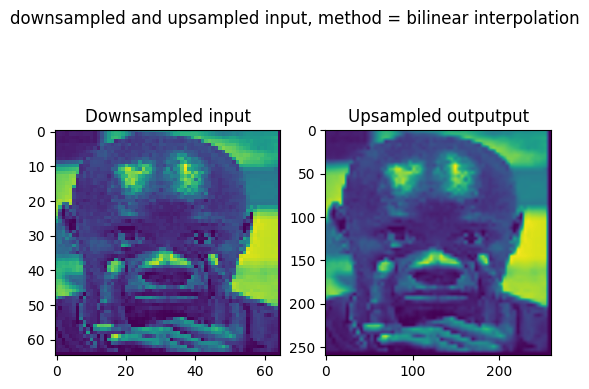

In [21]:
input_image=DownsampledImages[1]
output_upsampled=UpsampleImages[1]
# Visualize input and output
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Downsampled input')
axes[1].imshow(output_upsampled[:, :, 0])
axes[1].set_title('Upsampled outputput')
fig.suptitle(f'downsampled and upsampled input, method = bilinear interpolation')
plt.show()

In [22]:
len(UpsampleImages)

510

In [23]:
def detect_face(image):
    detector=MTCNN()
    bounds=detector.detect_faces(image)
    return bounds

In [24]:
def draw_bounding_boxes(image, bboxes):
    for box in bboxes:
        x,y,w,h=box['box']
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)

In [25]:
def mark_key_point(image, keypoint):
    cv2.circle(image, (keypoint), 1, (0,255,0), 2)

In [26]:
image = cv2.imread(OriginalImages[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = detect_face(image)
print("Output of MTCNN detector is...\n",bboxes)

1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 162ms/step
Output of MTCNN detector is...
 [{'box': [37, 40, 167, 219], 'confidence': 0.9999855756759644, 'keypoints': {'left_eye': (86, 122), 'right_eye': (165, 119), 'nose': (130, 162), 'mouth_left': (85, 196), 'mouth_right': (171, 193)}}]


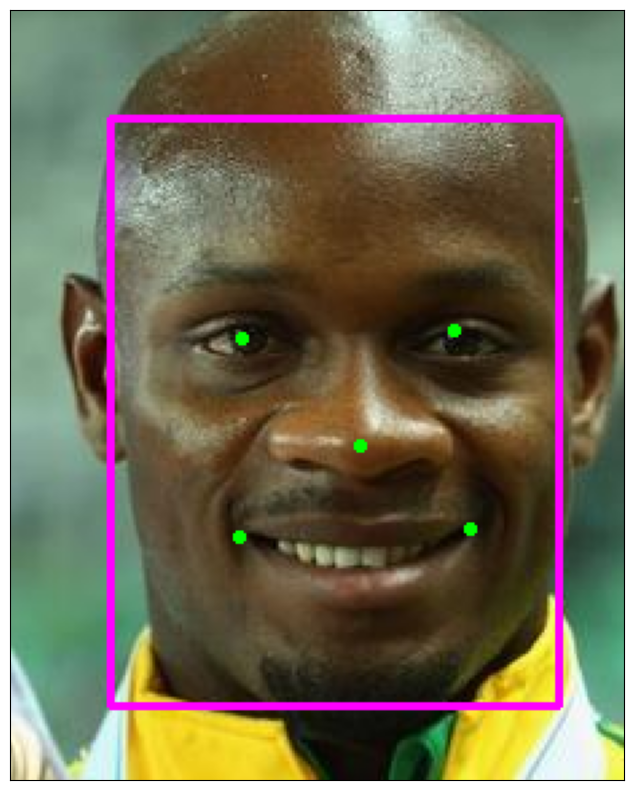

In [27]:
draw_bounding_boxes(image, bboxes)
mark_key_point(image, bboxes[0]['keypoints']['left_eye'])
mark_key_point(image, bboxes[0]['keypoints']['right_eye'])
mark_key_point(image, bboxes[0]['keypoints']['nose'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_left'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_right'])
# display the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
for i in range(len(OriginalImages)):
  image=cv2.imread(OriginalImages[i])
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  bboxes=detect_face(image)
  results.append(bboxes)
  print("Output of MTCNN detector is...\n",bboxes)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 155ms/step
Output of MTCNN detector is...
 [{'box': [0, 0, 216, 231], 'confidence': 0.9990127086639404, 'keypoints': {'left_eye': (63, 78), 'right_eye': (165, 71), 'nose': (120, 119), 'mouth_left': (79, 175), 'mouth_right': (163, 170)}}]
1/1 [==============================] - 0s 244ms/step
Output of MTCNN detector is...
 []
1/1 [==============================] - 0s 174ms/step
Output of MTCNN detector is...
 [{'box': [35, 0, 184, 190], 'confidence': 0.9984109401702881, 'keypoints': {'left_eye': (86, 46), 'right_eye': (176, 47), 'nose': (134, 106), 'mouth_left': (92, 135), 'mouth_right': (168, 137)}}]
1/1 [==============================] - 0s 195ms/step
Output of MTCNN detector is...
 [{'box': [18, 0, 155, 158], 'confidence': 0.9998766183853149, 'keypoints': {'left_eye': (60, 44), 'right_eye': (132, 42), 'nose': (101, 85), 'mouth_left': (63, 105), 'mouth_right': (135, 101)}}]
1/1 [===============

In [ ]:
results
#the 'box' defines the corners of the face, we need to extract that ^_^

[[{'box': [37, 40, 167, 219],
   'confidence': 0.9999855756759644,
   'keypoints': {'left_eye': (86, 122),
    'right_eye': (165, 119),
    'nose': (130, 162),
    'mouth_left': (85, 196),
    'mouth_right': (171, 193)}}],
 [{'box': [33, 94, 212, 290],
   'confidence': 0.9996813535690308,
   'keypoints': {'left_eye': (97, 206),
    'right_eye': (198, 205),
    'nose': (155, 259),
    'mouth_left': (100, 317),
    'mouth_right': (192, 316)}}],
 [{'box': [0, 0, 201, 241],
   'confidence': 0.9994338154792786,
   'keypoints': {'left_eye': (66, 78),
    'right_eye': (162, 83),
    'nose': (119, 125),
    'mouth_left': (69, 180),
    'mouth_right': (154, 182)}}],
 [{'box': [10, 0, 202, 242],
   'confidence': 0.9941222071647644,
   'keypoints': {'left_eye': (63, 90),
    'right_eye': (154, 83),
    'nose': (110, 124),
    'mouth_left': (76, 189),
    'mouth_right': (154, 184)}}],
 [{'box': [0, 0, 206, 248],
   'confidence': 0.9916834831237793,
   'keypoints': {'left_eye': (68, 79),
    'right

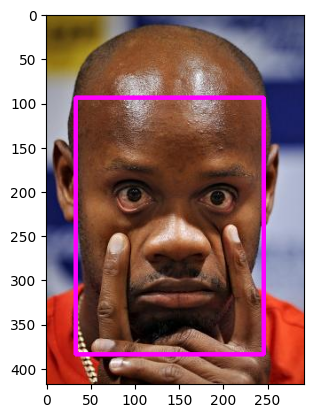

In [29]:
image=cv2.imread(OriginalImages[1])
x,y,w,h=results[1][0]['box']
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),4)
plt.imshow(image)

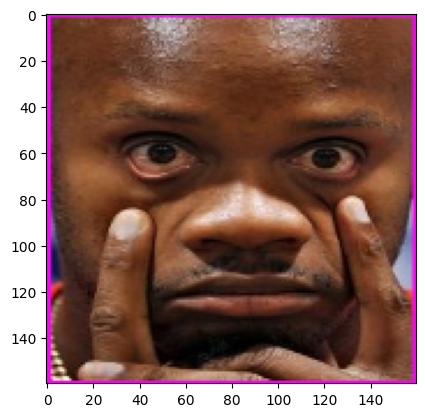

In [30]:
cropped=image[y:y+h,x:x+w]
#facenet takes in 160x160
cropped=cv2.resize(cropped,(160,160))
plt.imshow(cropped)

In [31]:
cropped

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [224,   9, 216],
        ...,
        [226,  18, 212],
        [241,   9, 234],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [115,  41,  77],
        ...,
        [126,  84,  62],
        [192,  40, 162],
        [255,   0, 255]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [254, 154, 186],
        ...,
        [128,  91,  68],
        [192,  44, 165],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [201,  98, 129],
        ...,
        [132,  90,  66],
        [196,  46, 167],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]]

#preprocessing

In [32]:
detector=MTCNN()

In [33]:
class Load_Face:
  def __init__(self,directory):
    #x:stores all images, y:stores all labels
    self.directory=directory
    self.size=(160,160)
    self.x=[]
    self.y=[]
    self.detector=MTCNN()

  def extract_face(self,file):
    image=cv2.imread(file)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x,y,w,h=self.detector.detect_faces(image)[0]['box']
    x,y=abs(x),abs(y)
    cropped_face=image[y:y+h,x:x+w]
    face_array=cv2.resize(cropped_face,self.size)
    return face_array
  
  def load_faces(self,dir):
    faces=[]
    for img_name in os.listdir(dir):
      try:
        path=dir+img_name
        single_face=self.extract_face(path)
        faces.append(single_face)
      except Exception as e:
        pass
    return faces 
  
  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
            path=self.directory +'/'+ sub_dir+'/'
            faces=self.load_faces(path)
            labels=[sub_dir for _ in range(len(faces))]
            print(f"Loaded successfully: {len(labels)}")
            self.x.extend(faces)
            self.y.extend(labels)
        
    return np.asarray(self.x), np.asarray(self.y)


In [34]:
face_loading=Load_Face('/content/drive/MyDrive/dataset')
x,y=face_loading.load_classes()

1/1 [==============================] - 0s 47ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 34ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 28ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 34ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 31ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 40ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 47ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 29ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 30ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 40ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 9
1/1 [===============

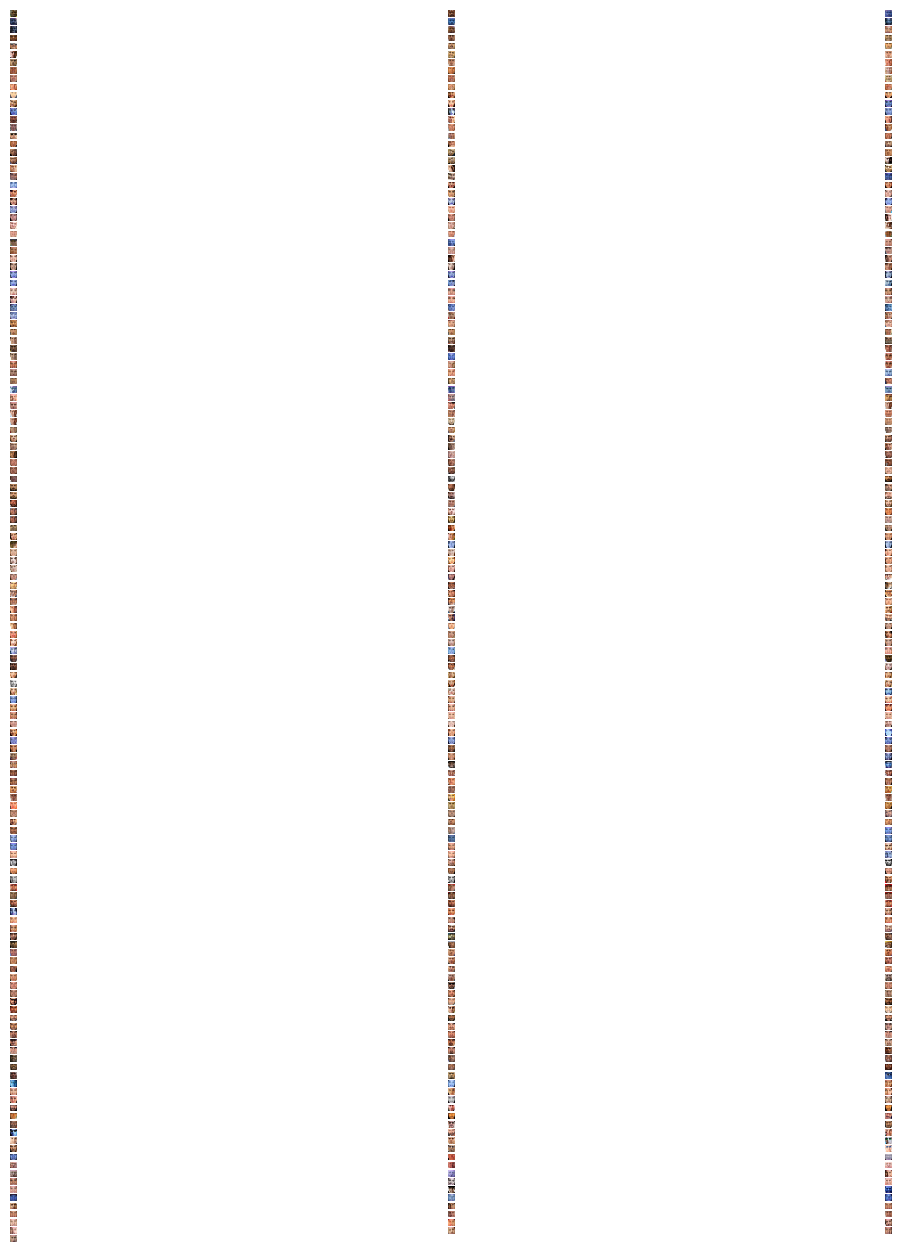

In [35]:
plt.figure(figsize=(16,16))
for num,image in enumerate(x):
    ncols=3
    nrows=len(y)//ncols+1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

#facenet part

In [36]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=cb931149630dbcc31964b1e221d0b7ff4fd080392bf23b40bf25d53c066729a4
  Stored in directory: /root/.cache/pip/wheels/73/5d/41/90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet


In [37]:
from keras_facenet import FaceNet
embedder=FaceNet()

In [38]:
def extract_embedding(face_img):
  face_img=face_img.astype('float32') #3d, 160x160x3
  face_img=np.expand_dims(face_img,axis=0) #facenet image is 3d, we need 4d (None*160*160*3)
  yhat=embedder.embeddings(face_img)
  return yhat[0] #512D image (1x1x512)

In [39]:
embedded_x=[]
for img in x:
  embedded_x.append(extract_embedding(img))
embedded_x=np.asarray(embedded_x) 

1/1 [==============================] - 0s 96ms/step


In [40]:
np.savez_compressed('face_embedding.npz',embedded_x,y) #provides storage of array data using gzip compression

#svm model

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)

In [42]:
len(embedded_x)

451

In [43]:
len(y)

451

In [44]:
y

array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 48, 48, 48, 48, 48, 48, 48, 48, 48, 46, 46, 46,
       46, 46, 46, 46, 46, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41,
       41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26,
       26, 26, 26, 26, 26

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(embedded_x,y,shuffle=True,random_state=15)

In [47]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid', probability=True)
model.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [48]:
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

1.0

In [50]:
accuracy_score(y_test,y_predict_test)

0.9734513274336283

Text(0, 0.5, '50')

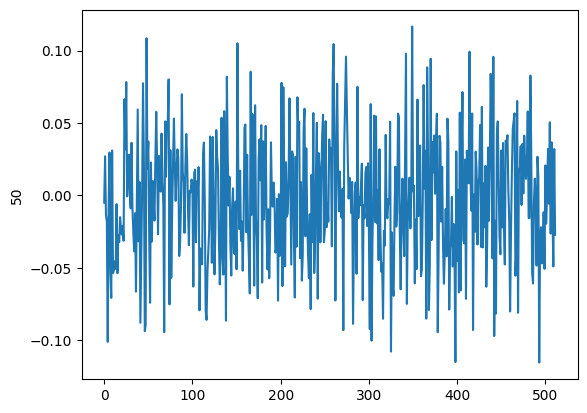

In [51]:
plt.plot(embedded_x[0]) 
plt.ylabel(y[0])

In [52]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

In [53]:
!pip freeze > requirements.txt

In [54]:
!mkdir test

#TESTING

In [55]:
#UpsampleImages
print(type(UpsampleImages[0]))
print(type(embedded_x[0]))
print(type(x[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [56]:
embedded_X=[]
for img in UpsampleImages:
  embedded_X.append(extract_embedding(img))
embedded_X=np.asarray(embedded_X) 

1/1 [==============================] - 0s 102ms/step


In [57]:
np.savez_compressed('test_face_embedding.npz',embedded_X,y) #provides storage of array data using gzip compression

In [58]:
y

array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 48, 48, 48, 48, 48, 48, 48, 48, 48, 46, 46, 46,
       46, 46, 46, 46, 46, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41,
       41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26,
       26, 26, 26, 26, 26

In [60]:
print(type(y))

<class 'numpy.ndarray'>


In [61]:
y_new=[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 48, 48, 48, 48, 48, 48, 48, 48, 48, 46, 46, 46,
       46, 46, 46, 46, 46, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41,
       41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24,
       24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 19, 19,
       19, 19, 19, 19, 19,  0,  0,  0,  0,  0,  0, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,  2,
        2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 13, 13, 13, 13,
       13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        5,  5,  5,  5,  5,  5,  5,  5,  5]

In [62]:
len(y_new)

451

In [63]:
for i in range(59):
  y_new.append(i)

In [64]:
len(y_new)

510

In [65]:
y_=np.array(y_new)

In [66]:
print(type(y_))

<class 'numpy.ndarray'>


In [67]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_)
y_=encoder.transform(y_)

In [68]:
len(embedded_X)

510

In [69]:
X_train,X_test,y_train,y_test=train_test_split(embedded_X,y_,shuffle=True,random_state=15)

In [70]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid', probability=True)
model.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [71]:
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

0.643979057591623

In [73]:
accuracy_score(y_test,y_predict_test)

0.6953125

Text(0, 0.5, '50')

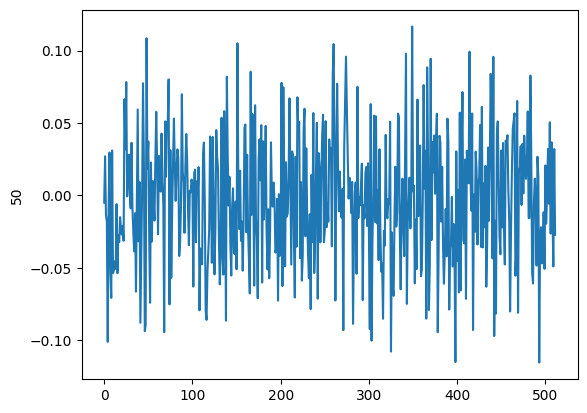

In [74]:
plt.plot(embedded_x[0]) 
plt.ylabel(y[0])